In [1]:
import pandas as pd

Vispirms ir jāimportē bibliotēka, ar kuru strādāsim - `pandas`. Ir pieņemts, ka to saīsina uz `pd`

In [2]:
meteo=pd.read_csv("meteo.csv",dayfirst=False,index_col=0,parse_dates=['date'])

Strādāsim ar meteoroloģiskajiem datiem, kuri satur dienas vidējās vērtības un ir piekārtoti datumam. Apskatot datu failu `meteo.csv` var redzēt, ka šoreiz datums sākas ar mēnesi, tāpēc `dayfirst = False`, datumu kolonnas nosaukums ir `date` un tas atrodas pirmajā (jeb nultajā, jo informātikā visu taču sāk skaitīt no nulles) kolonnā.

In [3]:
meteo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15706 entries, 1966-01-01 to 2008-12-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    15706 non-null  float64
 1   prec    15706 non-null  float64
 2   hum     15644 non-null  float64
dtypes: float64(3)
memory usage: 490.8 KB


Pārbaudīsim izveidoto datu tabulu `meteo`. Redzam, ka tabula veiksmīgi ir izveidota kā **laikrinda** un satur trīs meteoroloģiskos novērojumu veidus - temperatūru `temp`, nokrišņus `prec`, un relatīvo mitrumu `hum`.

In [4]:
meteo

,temp,prec,hum
date,,,
1966-01-01,-8.6,4.0,74.0
1966-01-02,-4.7,7.3,88.0
1966-01-03,-3.4,2.3,91.0
1966-01-04,-8.9,0.5,76.0
1966-01-05,-13.4,0.0,77.0
...,...,...,...
2008-12-27,2.0,0.0,92.0
2008-12-28,-3.2,0.0,96.0
2008-12-29,0.8,0.0,91.0


Aplūkojot datus izvērstā datu tabulas formā varam redzēt iepriekš minēto informāciju vizuāli

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FCE1706C40>,
      dtype=object)

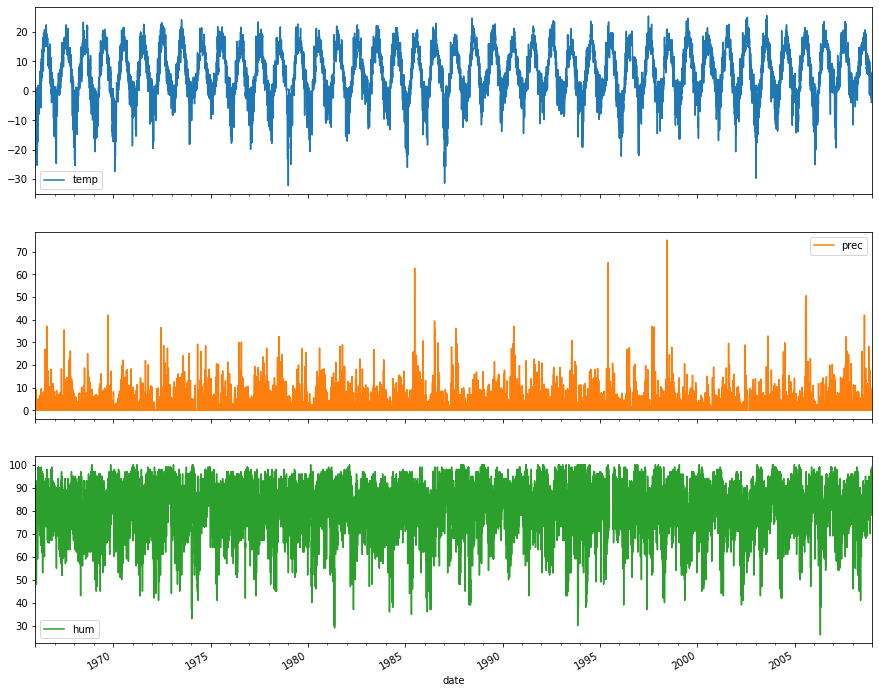

In [5]:
meteo.plot(subplots=True, figsize=(15,13))

Intereses pēc aplūkosim meteodatus grafiskā formā.

# Veģetācijas perioda analīze

Ir dažādi pieņemti veidi, kā nosaka veģetācijas periodu. Viens no tiem - veģetācijas periods ir sācies tad, kad piecas pēc kārtas esošās dienās gaisa vidējā temperatūra ir lielāka par 5C°. 

Katrai dienai visas laikrindas garumā var piemērot loģisku jautājumu - vai ir siltāks par 5 grādiem. Ja ir siltāks, tad pierakstīt šai dienai klāt - JĀ jeb `True`. Ja nav, tad - NĒ jeb `False`

In [6]:
meteo[">5"]=meteo["temp"].gt(5)


Izveidojam jaunu kolonnu `>5`, kura saturēs `True`, ja temperatūras kolonnā `temp` vērtība ir lielāka par 5. 

In [7]:
meteo["<5"]=~meteo[">5"]

Izveidojam vēl vienu kolonnu `<5`, kurā būs tās dienas, kad temperatūras vērtība ir mazāka par 5.
To izdarīsim citādāk -  *apgriezīsim* iepriekšizveidotās kolonnas `>5`, no `True` uz `False` izmantojot Būla algebras negācijas operatoru, plašāk pazīstamu kā `NOT` operatoru un to norādot ar tildes simbolu `~`.

In [8]:
meteo

,temp,prec,hum,>5,<5
date,,,,,
1966-01-01,-8.6,4.0,74.0,False,True
1966-01-02,-4.7,7.3,88.0,False,True
1966-01-03,-3.4,2.3,91.0,False,True
1966-01-04,-8.9,0.5,76.0,False,True
1966-01-05,-13.4,0.0,77.0,False,True
...,...,...,...,...,...
2008-12-27,2.0,0.0,92.0,False,True
2008-12-28,-3.2,0.0,96.0,False,True
2008-12-29,0.8,0.0,91.0,False,True


Pārbaudām izveidotās kolonnas.

## Dienu skaitīšana

Lai varētu definēt veģetācijas perioda sākumu, ir nepieciešams skaitīt piecas dienas pēc kārtas, kad temperatūra ir lielāka par 5°C. Tā kā temperatūra svārstās un var būt situācijas, kad pēc piecām vai vairāk siltām dienām ir temperatūra, kas ir zemāka par nulli. Tad siltās dienas ir jāskaita no jauna.


In [9]:
a_v = meteo[[">5"]] != 0
a_z = meteo[["<5"]] != 0

Izveidojot atsevišķas tabulas vasarai `a_v` un ziemai `a_z`, kuras saturēs tikai un vienīgi informāciju par veģetācijas un ne-veģetācijas periodu, šīs tabulas varēs izmatot, lai veiktu dienu skaitīšanu nākamajā solī.

In [10]:
df_v = a_v[">5"].cumsum() - a_v[">5"].cumsum().where(~a_v[">5"]).ffill().fillna(0)
df_z= a_z["<5"].cumsum() - a_z["<5"].cumsum().where(~a_z["<5"]).ffill().fillna(0)

Šajās rindiņās ir apvienotas vairākas secīgi sakārtotas funkcijas darbam ar tabulu. 
1. tiek skaitīti pēc kārtas esoši `True` ieraksti izmantojot kumulatīvo summēšanu `.cumsum()`. 
2. `.where()` norāda kritēriju, ka kumulatīvā summa tiks skaitīta, bet tabulā atlasīta un parādīsies tur, kur temperatūra lielāka par 5°C
3. `.ffill()` norāda, ka nākošā tabulas ieraksta vērtība ir tāda pati, kā iepriekšējā
4. `.fillna(0)` norāda, ka, ja kādā rindiņā vērtība neeksistē, tad to aizstāt ar `0`

No divām šādi sagatavotām tabulām ar kumulatīvo summu var aplūkot to starpību

Lai labāk šo izprastu, ir vērts apskatīt nākošo koda izvedumu, kur tiek izveidotas 
1. trīs atsevišķas tabulas `a_v1`, `a_v2` un `a_v3`, 
2. no visas laikrindas apskatīts tikai 1984.gada aprīlis
3. tabulas apvienotas kopējā tabulā `g`

In [11]:
############################## piemērs ###################
a_v1=a_v[">5"].cumsum()
a_v2=a_v[">5"].cumsum().where(~a_v[">5"])
a_v3=a_v[">5"].cumsum().where(~a_v[">5"]).ffill()

f1=a_v1["1984-04"].to_frame() # >5_x
f2=a_v2["1984-04"].to_frame() # >5_y
f3=a_v3["1984-04"].to_frame() # >5

g=pd.merge(f1,f2, on="date")
g=pd.merge(g,f3, on="date")
g
##########################################################

,>5_x,>5_y,>5
date,,,
1984-04-01,3388,3388.0,3388.0
1984-04-02,3388,3388.0,3388.0
1984-04-03,3388,3388.0,3388.0
1984-04-04,3389,NaN,3388.0
1984-04-05,3390,NaN,3388.0
1984-04-06,3391,NaN,3388.0
1984-04-07,3392,NaN,3388.0
1984-04-08,3393,NaN,3388.0
1984-04-09,3394,NaN,3388.0


In [12]:
df_z=df_z.to_frame()
df_v=df_v.to_frame()

Iepriekš aprēķinātās tabulas ar virs 5°C grādiem `df_v` un zem 5°C grādiem ir skaitļu virknes. Tās nepieciešams pārveidot par atsevišķām tabulām, izmantojot funkciju `.to_frame()`.

In [14]:
g=pd.merge(df_v,df_z, on="date")
g["1984-04"]

,>5,<5
date,,
1984-04-01,0.0,144.0
1984-04-02,0.0,145.0
1984-04-03,0.0,146.0
1984-04-04,1.0,0.0
1984-04-05,2.0,0.0
1984-04-06,3.0,0.0
1984-04-07,4.0,0.0
1984-04-08,5.0,0.0
1984-04-09,6.0,0.0


Šīs abas tabulas ir vērts apvienot, izmantojot `.merge()` norādot, ka abas tabulas ir indeksētas pēc datuma kolonnas `date`
Pie reizes arī pārbaudīt kādu periodu, kurā temperatūra varētu būt gan virs, gan zem šiem 5°C grādiem.

In [15]:
meteo[">5cumSum"]=df_v
meteo["<5cumSum"]=df_z
meteo

,temp,prec,hum,>5,<5,>5cumSum,<5cumSum
date,,,,,,,
1966-01-01,-8.6,4.0,74.0,False,True,0.0,1.0
1966-01-02,-4.7,7.3,88.0,False,True,0.0,2.0
1966-01-03,-3.4,2.3,91.0,False,True,0.0,3.0
1966-01-04,-8.9,0.5,76.0,False,True,0.0,4.0
1966-01-05,-13.4,0.0,77.0,False,True,0.0,5.0
...,...,...,...,...,...,...,...
2008-12-27,2.0,0.0,92.0,False,True,0.0,25.0
2008-12-28,-3.2,0.0,96.0,False,True,0.0,26.0
2008-12-29,0.8,0.0,91.0,False,True,0.0,27.0


Papildināsim galveno meteoroloģisko datu tabulu ar dienu skaitīšanas datiem atbilstoši dienu skaitam, kad temperatūra ir lielāka par 5°C `">5cumSum"` un, attiecīgi, kad tā ir zemāka par  5°C `"<5cumSum"`

In [16]:
meteo['veg_period']=False


Izveidosim tukšu kolonnu, kurā tiks aprēķināts tas, vai ir 5 dienas pēc kārtas temperatūra augstāka par 5°C

In [17]:
if(meteo['>5'].iloc[0]==False):
    meteo['veg_period'].iloc[0]=False
else:
    meteo['veg_period'].iloc[0]=True


C:\Users\didzi\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Noteiksim, vai tabulas pirmās dienas temperatūra ir atbilstoša veģetācijas periodam vai nē.
Lai to izdarītu, jānosaka vērtība pirmās dienas kolonnā `">5`. 
Pirmo dienu norāda ar indeksa lokatoru `.iloc[0]`, (atceroties, ka informātikas tehnoloģijās visu sāk skaitīt no 0)

Ar indeksa lokatora palīdzību var arī vērtības piešķirt, lai gan šajā gadījumā `pandas` parādīs brīdinājuma ziņojumu, ka tā labāk darīt nevajadzētu.

In [18]:
for i in range(1,len(meteo)):    
    if (meteo['>5cumSum'].iloc[i]>=5):
        meteo['veg_period'].iloc[i]=True
    elif (meteo['<5cumSum'].iloc[i]>=5):
        meteo['veg_period'].iloc[i]=False
    else:
        meteo['veg_period'].iloc[i]=meteo['veg_period'].iloc[i-1]

Ir neskaitāmi veidi, kā aplūkot datus ciklā. 
Šajā gadījumā izmantosim `for` ciklu un sāksim skaitīt no otrās dienas (kura ir indeksēta ar kārtas skaitli `1`) līdz pat pēdējam tabulas ierakstam (tātad visas tabulas garumā `len()` )

Katrā ierakstā ir jāapskata dienu skaits `>5cumSum`, kad temperatūra ir lielāka par 5°C, un ja tas ir vienāds vai lielāks par izvēlēto robežvērtību - **5 dienas** , tad jāpieņem, ka ir sācies veģetācijas periods.
Paralēli ir jāskaita dienu skaits `<5cumSum`, kad temperatūra ir bijusi mazāka par 5°C, un ja tas ir vienāds vai lielāks par šīm piecām dienām, tad jāpieņem, ka ir sācies ne-veģetācijas periods.
Taču, ja dienu skaits ir mazāks par 5 abiem diviem periodiem, tad tiek ņemta vērā iepriekšējās dienas vērtība - veģetācijas vai neveģetācijas periods.


In [19]:
meteo["veg_period"]=meteo.veg_period.shift(-4)
meteo["veg_period"]=meteo.veg_period.ffill()

Visbeidzot ir jāpārbīda veģetācijas perioda iegūtie dati 4 dienas atpakaļ, jo iepriekšuzrakstītais algoritms nosaka, ka veģetācijas periods sākas 5.dienā. To var izdarīt ar `.shift()` funkciju.
Veicot šādu pārbīdi, pēdējie četri tabulas dati tiks pazaudēti un to vērtība būs `NaN` (tās vienkārši nebūs). Izmantojot funkciju `.ffill()` šīs `NaN` vērtības tiks pārrakstītas ar pēdējo zināmo vērtību.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FCE37876A0>,
      dtype=object)

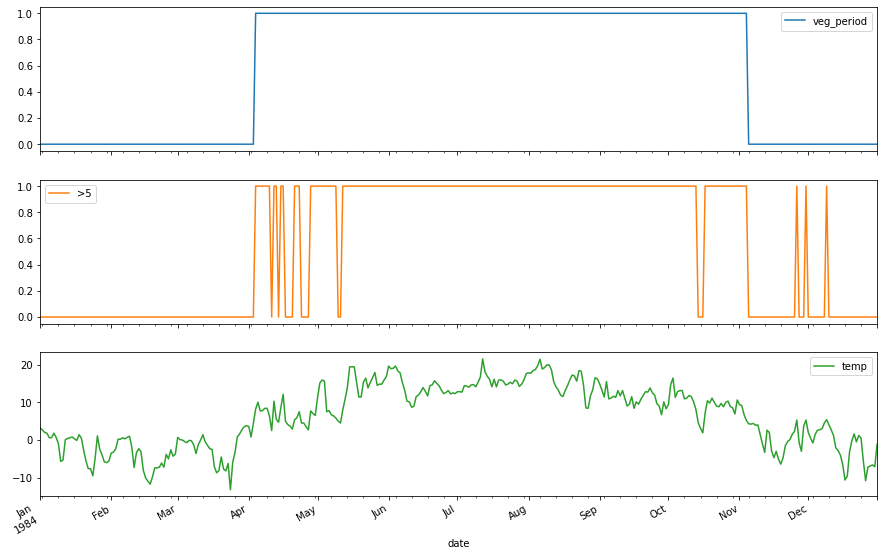

In [20]:
meteo[["veg_period",">5","temp"]].loc["1984"].astype(float).plot(subplots=True, figsize=(15,10))

Visbeidzot izvēlamies kādu no visiem periodiem (1984 gadu, piemēram) un attēlojam grafiski temperatūru (zaļā krāsā), dienas, kad temperatūra ir lielāka par 5°C (oranžā krāsā) un veģetācijas periodu (zilā krāsā)